In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


### Importing dataset

In [4]:
dataset = pd.read_csv('breast_cancer.csv')
dataset = dataset.drop(columns=['Sample code number'])
dataset = dataset.reset_index(drop=True)

In [6]:
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Data Preprocessing

In [7]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
dataset.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


### Data Visualization

In [21]:
dataset_corr = dataset.corr()

<Axes: >

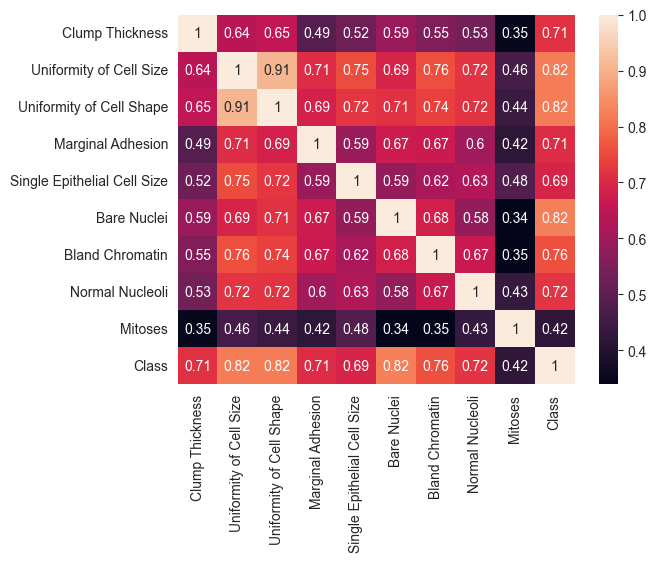

In [23]:
sns.heatmap(dataset_corr, annot=True)

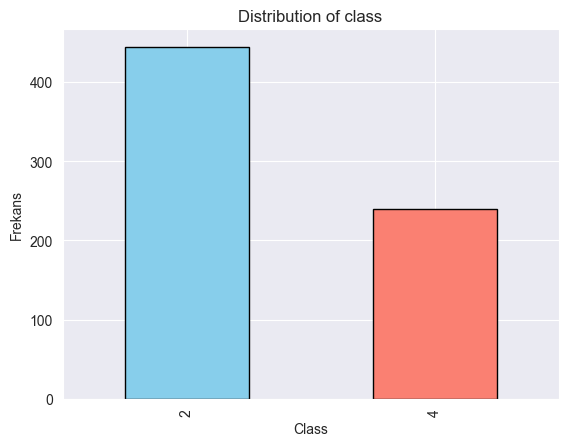

In [25]:
dataset['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribution of class')
plt.xlabel('Class')
plt.ylabel('Frekans')
plt.show()


### Evaluate models

In [22]:
def evaluate_models(data): 
    # Splitting the dataset into the training and test set
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVC": SVC(kernel='rbf', random_state=42)
    }

    accuracies = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
        accuracies[name] = round(float(scores.mean() * 100), 2)

    return accuracies

In [26]:
accurecies = evaluate_models(dataset)
accurecies

{'Logistic Regression': 96.71,
 'Naive Bayes': 96.33,
 'K-Nearest Neighbors': 96.71,
 'Decision Tree': 94.33,
 'Random Forest': 96.52,
 'SVC': 96.71}

In [27]:
def plot_accuracies(accuracies):
    # Modelleri ve doğruluklarını ayır
    models = list(accuracies.keys())
    scores = list(accuracies.values())

    # Grafik oluştur
    plt.figure(figsize=(10, 6))
    plt.barh(models, scores, color='skyblue')
    plt.xlabel('Doğruluk Oranı (%)')
    plt.title('Model Doğruluk Oranları')
    plt.xlim(0, 100)  # Doğruluk oranlarını %0 - %100 arasında göster
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Grafik göster
    plt.show()

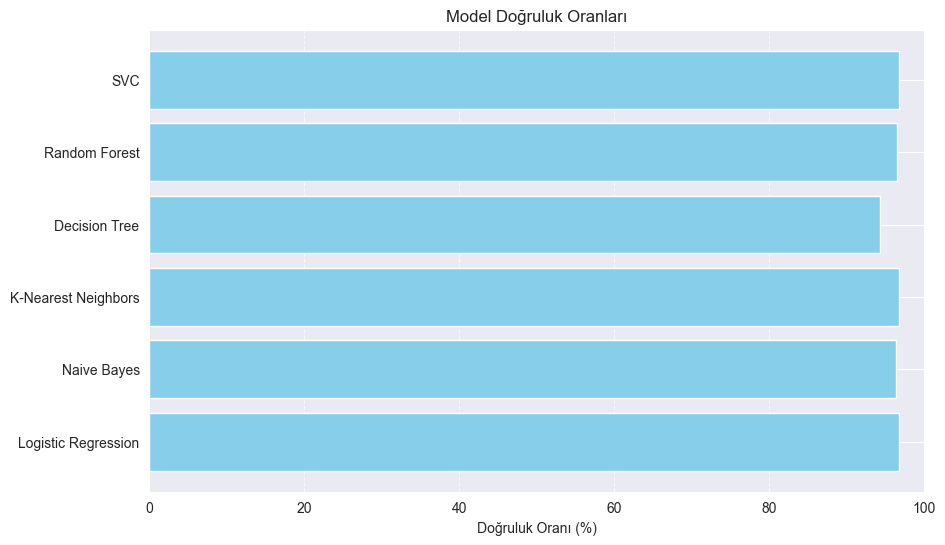

In [28]:
plot_accuracies(accurecies)